In [1]:
import tensorflow as tf
import keras

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [3]:
model=ResNet50(include_top=False,weights="imagenet")

C:\Users\user\Anaconda3\lib\site-packages\keras_applications\resnet50.py:264: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

Non-trainable params: 53,120
__________________________________________________________________________________________________


In [5]:
from PIL import Image
import numpy as np

In [6]:
#will get an img_loc and it will open img, resize, convert it to a numpy array
#reshape the numpy array into (1,height,width,no of channels),predict,reshape
def img_pred(img_loc):
    newimg=Image.open(img_loc)
    newimg=newimg.resize((386,386))
    newimg_arr=np.asarray(newimg,dtype=float)
    newimg_arr=newimg_arr.reshape((1,newimg_arr.shape[0],newimg_arr.shape[1],newimg_arr.shape[2]))
    pred=model.predict(newimg_arr)
    pred=pred.reshape(1,-1)
    return(pred)

In [7]:
#Define our similarity function
#take in 2 predictions, find the difference, square those, sum over all the values
#divide it by shape of pred

In [8]:
def similarity_func(predA,predB):
    diff=predA-predB
    diff=diff*diff
    return(np.sum(diff)/predA.shape[1])

In [11]:
img_loc1=r"data\cropped\2.jpg"
img_loc2=r"data\cropped\3.jpg"
img_loc3=r"data\cropped\4.jpg"
img_loca=r"data\cropped\a.jpg"
img_locb=r"data\cropped\b.jpg"

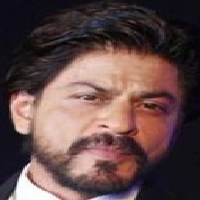

In [12]:
Image.open(img_loc1).resize((200,200))

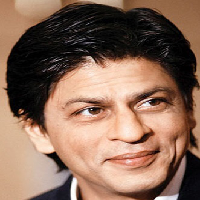

In [13]:
Image.open(img_loc2).resize((200,200))

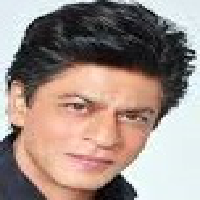

In [14]:
Image.open(img_loc3).resize((200,200))

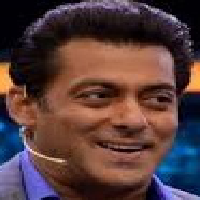

In [15]:
Image.open(img_loca).resize((200,200))

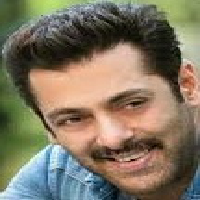

In [16]:
Image.open(img_locb).resize((200,200))

In [17]:
pred1=img_pred(img_loc1)

In [18]:
pred2=img_pred(img_loc2)
pred3=img_pred(img_loc3)
preda=img_pred(img_loca)
predb=img_pred(img_locb)

In [19]:
pred2.shape

(1, 294912)

In [20]:
print("similarity between image1 and image1 is {}".format(similarity_func(pred1,pred1)))
print("similarity between image1 and image2 is {}".format(similarity_func(pred1,pred2)))
print("similarity between image1 and image3 is {}".format(similarity_func(pred1,pred3)))
print("similarity between image1 and imagea is {}".format(similarity_func(pred1,preda)))
print("similarity between image1 and imageb is {}".format(similarity_func(pred1,predb)))


similarity between image1 and image1 is 0.0
similarity between image1 and image2 is 2.637037913004557
similarity between image1 and image3 is 2.8723532358805337
similarity between image1 and imagea is 3.2496799892849393
similarity between image1 and imageb is 3.4453241560194225


In [21]:
print("similarity between image2 and image1 is {}".format(similarity_func(pred2,pred1)))
print("similarity between image2 and image2 is {}".format(similarity_func(pred2,pred2)))
print("similarity between image2 and image3 is {}".format(similarity_func(pred2,pred3)))
print("similarity between image2 and imagea is {}".format(similarity_func(pred2,preda)))
print("similarity between image2 and imageb is {}".format(similarity_func(pred2,predb)))


similarity between image2 and image1 is 2.637037913004557
similarity between image2 and image2 is 0.0
similarity between image2 and image3 is 2.7959172990587025
similarity between image2 and imagea is 3.247783448961046
similarity between image2 and imageb is 3.22438727484809


In [22]:
print("similarity between image3 and image1 is {}".format(similarity_func(pred3,pred1)))
print("similarity between image3 and image2 is {}".format(similarity_func(pred3,pred2)))
print("similarity between image3 and image3 is {}".format(similarity_func(pred3,pred3)))
print("similarity between image3 and imagea is {}".format(similarity_func(pred3,preda)))
print("similarity between image3 and imageb is {}".format(similarity_func(pred3,predb)))


similarity between image3 and image1 is 2.8723532358805337
similarity between image3 and image2 is 2.7959172990587025
similarity between image3 and image3 is 0.0
similarity between image3 and imagea is 3.4510120815700955
similarity between image3 and imageb is 3.4286920759412975


In [23]:
print("similarity between imagea and image1 is {}".format(similarity_func(preda,pred1)))
print("similarity between imagea and image2 is {}".format(similarity_func(preda,pred2)))
print("similarity between imagea and image3 is {}".format(similarity_func(preda,pred3)))
print("similarity between imagea and imagea is {}".format(similarity_func(preda,preda)))
print("similarity between imagea and imageb is {}".format(similarity_func(preda,predb)))


similarity between imagea and image1 is 3.2496799892849393
similarity between imagea and image2 is 3.247783448961046
similarity between imagea and image3 is 3.4510120815700955
similarity between imagea and imagea is 0.0
similarity between imagea and imageb is 3.621412065294054


In [24]:
print("similarity between imageb and image1 is {}".format(similarity_func(predb,pred1)))
print("similarity between imageb and image2 is {}".format(similarity_func(predb,pred2)))
print("similarity between imageb and image3 is {}".format(similarity_func(predb,pred3)))
print("similarity between imageb and imagea is {}".format(similarity_func(predb,preda)))
print("similarity between imageb and imageb is {}".format(similarity_func(predb,predb)))


similarity between imageb and image1 is 3.4453241560194225
similarity between imageb and image2 is 3.22438727484809
similarity between imageb and image3 is 3.4286920759412975
similarity between imageb and imagea is 3.621412065294054
similarity between imageb and imageb is 0.0


In [25]:
#Image Retrival part

In [26]:
import os

In [35]:
directory=r"data\actors"

In [36]:
number_to_filename={} #number 0 to 10 into filenames
filename_to_prediction={} #filename to prediction. stores all predictions
i=0
for filename in os.listdir(directory):
    number_to_filename[i]=filename
    filename_to_prediction[filename]= img_pred(directory+"\\"+filename)
    i+=1

In [37]:
number_to_filename

{0: '1 (1).jpg',
 1: '1 (10).jpg',
 2: '1 (2).jpg',
 3: '1 (3).jpg',
 4: '1 (4).jpg',
 5: '1 (5).jpg',
 6: '1 (6).jpg',
 7: '1 (7).jpg',
 8: '1 (8).jpg',
 9: '1 (9).jpg'}

In [38]:
new_img_to_compare_loc=r"C:\Users\user\Desktop\live edu\Image retrieval by similarity\data\actors test\a.jpg"

In [39]:
new_img_pred=img_pred(new_img_to_compare_loc)

In [40]:
difference={}
for i in range(len(number_to_filename)):
    difference[i]=similarity_func(new_img_pred,filename_to_prediction[number_to_filename[i]])

In [41]:
difference

{0: 2.9299748738606772,
 1: 3.6215998331705728,
 2: 3.5687599182128906,
 3: 3.3716028001573353,
 4: 3.3895286983913846,
 5: 3.0503487057156033,
 6: 2.9121797349717884,
 7: 2.91695679558648,
 8: 2.8847654130723743,
 9: 3.6305215623643665}

In [42]:
print(number_to_filename[8])

1 (8).jpg
